In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#1-Analysis of the dataset

In [3]:
data=pd.read_csv('COVID19_line_list_data.csv')
data.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#The first row after the headers is empty, we'll drop it
data.drop(data.index[[0]], inplace=True)

##Text mining and extraction of information from summary

In [5]:
#Shape of the data
data.shape

(1084, 27)

In [6]:
#Diplaying count of NaN and choosing which columns to eliminate
data.isna().sum()

id                          0
case_in_country           196
reporting date              1
Unnamed: 3               1084
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   814
source                      0
link                        0
Unnamed: 21              1084
Unnamed: 22              1084
Unnamed: 23              1084
Unnamed: 24              1084
Unnamed: 25              1084
Unnamed: 26              1084
dtype: int64

In [7]:
#First step is to drop 6 columns that are fully empty
list_to_drop=["Unnamed: 3", "Unnamed: 25", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24","Unnamed: 25","Unnamed: 26"]
data2= data.drop(columns=list_to_drop)
data2.isna().sum()

id                         0
case_in_country          196
reporting date             1
summary                    5
location                   0
country                    0
gender                   183
age                      242
symptom_onset            522
If_onset_approximated    525
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                  814
source                     0
link                       0
dtype: int64

Now let's explore content in more depth

In [8]:
#we'll replace np.nan with "NaN" in order to display sets of values for each column
data2.fillna("NaN", inplace=True)
for col in data2.columns:
  print(col, "######### values: ", set(data2[col]))

id ######### values:  {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [9]:
#we'll drop the first 2 columns because it's clear that they are indexes, 
#Last two "source" and "link" are meta-data, we'll not need them also

list_to_drop2=[ "id", "source", "link"]
data3= data2.drop(columns=list_to_drop2)

for col in data3.columns:
  print(col, "######### values: ", set(data3[col]))

case_in_country ######### values:  {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 1

In [10]:
data4=data3.copy()

Now we'll try to fill in missing data based on summary

In [11]:
#let's start with country
data5=data4.copy()
data5.loc[data5.country=='NaN'].summary

Series([], Name: summary, dtype: object)

In [12]:
data5.loc[data5.summary.str.contains('patient in Japan'), "country"]= data5.loc[data5.summary.str.contains('patient in Japan'), "country"].replace(['NaN'], 'Japan')
data5.loc[data5.summary.str.contains('patient in UK'), "country"]= data5.loc[data5.summary.str.contains('patient in UK'), "country"].replace(['NaN'], 'Japan')

In [13]:
data5.loc[data5.summary=='new confirmed COVID-19 patient in'].country

Series([], Name: country, dtype: object)

We can conclude (based on summary) that the remaining missing NaN are probably linked to USA

In [14]:
data5.loc[data5.summary=='new confirmed COVID-19 patient in', "country"]= data5.loc[data5.summary=='new confirmed COVID-19 patient in', "country"].replace('NaN', "USA")

In [15]:
data5.loc[data5.country=='NaN']

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom


Now country is clear, let's move to gender

In [16]:
data6=data5.copy()
data6.loc[data6.gender=='NaN'].summary

202     new confirmed COVID-19 patient in Paris, Franc...
203     new confirmed COVID-19 patient in France: 9, i...
204     new confirmed COVID-19 patient in France: in c...
205     new confirmed COVID-19 patient in France: in c...
206     new confirmed COVID-19 patient in France: in c...
                              ...                        
1062    new COVID-19 patient confirmed in Bahrain: ret...
1063           new COVID-19 patient confirmed in Bahrain:
1079    new COVID-19 patient confirmed in Austria: 24,...
1080    new COVID-19 patient confirmed in Austria: 24,...
1081    new COVID-19 patient confirmed in Afghanistan:...
Name: summary, Length: 183, dtype: object

In [17]:
data6.gender.replace(['20'], 'male', inplace=True) #replace one value of 20 by "male"
set(data6.gender)

{'NaN', 'female', 'male'}

In [18]:
#Fill NaN based on descriptions
data6.loc[data6.summary.str.contains('male'), "gender"]= data6.loc[data6.summary.str.contains('male'), "gender"].replace(['NaN'], 'male')
data6.loc[data6.summary.str.contains('female'), "gender"]= data6.loc[data6.summary.str.contains('female'), "gender"].replace(['NaN'], 'female')
data6.loc[data6.summary.str.contains('Male'), "gender"]= data6.loc[data6.summary.str.contains('Male'), "gender"].replace(['NaN'], 'male')
data6.loc[data6.summary.str.contains('Female'), "gender"]= data6.loc[data6.summary.str.contains('Female'), "gender"].replace(['NaN'], 'female')
data6.loc[data6.summary.str.contains('man'), "gender"]= data6.loc[data6.summary.str.contains('man'), "gender"].replace(['NaN'], 'male')
data6.loc[data6.summary.str.contains('Man'), "gender"]= data6.loc[data6.summary.str.contains('Man'), "gender"].replace(['NaN'], 'male')
data6.loc[data6.summary.str.contains('woman'), "gender"]= data6.loc[data6.summary.str.contains('woman'), "gender"].replace(['NaN'], 'male')
data6.loc[data6.summary.str.contains('Woman'), "gender"]= data6.loc[data6.summary.str.contains('Woman'), "gender"].replace(['NaN'], 'male')

In [19]:
#how many still not resolved (gender) ?
print("Not resolved: ", len(data6.loc[data6.gender=='NaN']))
for sum in data6.loc[data6.gender=='NaN'].summary:
  print(sum)

Not resolved:  152
new confirmed COVID-19 patient in Paris, France: doctor infected by patient 1/25-No.1, hospitalized
new confirmed COVID-19 patient in France: 9, in contact with Briton who had been in Singapore and was positive
new confirmed COVID-19 patient in France: in contact with Briton who had been in Singapore and was positive
new confirmed COVID-19 patient in France: in contact with Briton who had been in Singapore and was positive
new confirmed COVID-19 patient in France: in contact with Briton who had been in Singapore and was positive
new confirmed COVID-19 patient in France: in contact with Briton who had been in Singapore and was positive
new confirmed COVID-19 patient in France: in contact with Briton who had been in Singapore and was positive
new confirmed COVID-19 patient in France: Paris, contact of case 15
new confirmed COVID-19 patient in France: Paris, contact of case 15
new confirmed COVID-19 patient in France: Dijon, contact of case 15
new confirmed COVID-19 pat

As of now for the rest, there is no information about gender in summary, we'll get back to them later, let's move to location

In [20]:
data7=data6.copy()
data7.loc[data7.location=='NaN'].summary

Series([], Name: summary, dtype: object)

In [21]:
#We can't extract locations from summary (though they might not be existing), so we'll fill in by the corresponding country capital
set(data7.loc[data7.location=='NaN'].country)

set()

In [22]:
data7.loc[(data7.location=='NaN') & (data7.country=='Japan'), 'location']= data7.loc[(data7.location=='NaN') & (data7.country=='Japan'), 'location'].replace(['NaN'], 'Tokyo')
data7.loc[(data7.location=='NaN') & (data7.country=='USA'), 'location']= data7.loc[(data7.location=='NaN') & (data7.country=='USA'), 'location'].replace(['NaN'], 'Washington')

In [23]:
data7.loc[data7.location=='NaN']

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom


location is now cleared, let's move to If_onset_approximated

In [24]:
data8=data7.copy()
data8.dtypes

case_in_country          object
reporting date           object
summary                  object
location                 object
country                  object
gender                   object
age                      object
symptom_onset            object
If_onset_approximated    object
hosp_visit_date          object
exposure_start           object
exposure_end             object
visiting Wuhan            int64
from Wuhan               object
death                    object
recovered                object
symptom                  object
dtype: object

In [25]:
set(data8.If_onset_approximated)

{0.0, 1.0, 'NaN'}

In [26]:
data8.If_onset_approximated.replace([53], 1, inplace=True) #replace 53 value  by 1

In [27]:
len(data8.loc[data8.If_onset_approximated=='NaN'])

525

In [28]:
data8.loc[data8.summary.str.contains('related'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('related'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('father'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('father'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('mother'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('mother'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('aunt'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('aunt'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('cousin'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('cousin'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('husband'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('husband'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('wife'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('wife'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('traveled'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('traveled'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('went to'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('went to'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('link to'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('link to'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('contracted'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('contracted'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('returned'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('returned'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('health personnel'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('health personnel'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('healthcare professional'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('healthcare professional'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('resident'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('resident'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('traveler'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('traveler'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('travelled'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('travelled'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('doctor'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('doctor'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('nurse'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('nurse'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('member'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('member'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('attended'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('attended'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('flew'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('flew'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('part of'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('part of'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('went'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('went'), "If_onset_approximated"].replace(['NaN'], 1)
data8.loc[data8.summary.str.contains('previously in'), "If_onset_approximated"]= data8.loc[data8.summary.str.contains('previously in'), "If_onset_approximated"].replace(['NaN'], 1)

In [29]:
len(data8.loc[data8.If_onset_approximated=='NaN'])

339

Still 2042 not resolved, we'll get back to them later. Now let's move on to case_in_country

In [30]:
data9=data8.copy()
set(data9.case_in_country)

{1.0,
 10.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 11.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 12.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 13.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 14.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 1443.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 15.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 16.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 17.0,
 170.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 176.0,
 177.0,
 178.0,
 179.0,
 18.0,
 180.0,
 181.0,
 182.0,
 183.0,
 184.0,
 185.0,
 186.0,
 187.0,
 188.0,
 189.0,
 19.0,
 190.0,
 2.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 286.0,
 29.0,
 298.0,
 3.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 365.0,
 37.0,
 38.0,
 39.0,
 4.0,
 40.0

In [31]:
len(data9.loc[data9.case_in_country=='NaN'])

196

In [32]:
set(data9.loc[data9.case_in_country=='NaN'].country)

{'China'}

In [33]:
set(data9.loc[data9.country=='China'].case_in_country)

{'NaN'}

In [34]:
#The only country missind 'Case_in_country' is 'China' and this value is not present in any line related to china, so we'll count them and fill in
china_cases=len(data9.loc[data9.country=='China'])
print(china_cases)

196


In [35]:
data9.loc[data9.country=='China', "case_in_country"]= data9.loc[data9.country=='China', "case_in_country"].replace(['NaN'], china_cases)

In [36]:
len(data9.loc[data9.case_in_country=='NaN'])

0

setting up outcome

In [37]:
data9['outcome']='NaN'
data9.loc[data9["recovered"] != '0','outcome'] = 'recovered'
data9.loc[data9["death"] != '0','outcome'] = 'dead'
data9.loc[(data9["outcome"] != 'dead') & (data9["outcome"] != 'recovered'),'outcome'] = 'in_process'

case_in_country is now resolved, let's move to age

In [38]:
data10=data9.copy()
set(data10.age)

{0.25,
 0.5,
 1.0,
 11.0,
 15.0,
 16.0,
 18.0,
 19.0,
 2.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 4.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 5.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 6.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 8.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 89.0,
 9.0,
 91.0,
 96.0,
 'NaN'}

##Encoding and replacing missing values by Mean, Median, Mode

In [39]:
data11=data10.copy()
data11=data11.drop('summary', axis=1) #we no longer need summary
for col in data11.columns:
  print(col, "######### values: ", set(data11[col]))

case_in_country ######### values:  {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 1

In [40]:
numeric_cols=['case_in_country', 'age','If_onset_approximated',  'visiting Wuhan','from Wuhan'  ]
data11[numeric_cols] = data11[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [41]:
data11.dtypes

case_in_country            int64
reporting date            object
location                  object
country                   object
gender                    object
age                      float64
symptom_onset             object
If_onset_approximated    float64
hosp_visit_date           object
exposure_start            object
exposure_end              object
visiting Wuhan             int64
from Wuhan               float64
death                     object
recovered                 object
symptom                   object
outcome                   object
dtype: object

In [42]:
location_enc = OrdinalEncoder()
res=location_enc.fit_transform(data11['location'].values.reshape(-1, 1))
data11['location']=pd.Series(res.reshape(-1))

In [43]:
country_enc = OrdinalEncoder()
res=country_enc.fit_transform(data11['country'].values.reshape(-1, 1))
data11['country']=pd.Series(res.reshape(-1))

In [44]:
gender_enc = OrdinalEncoder()
res=gender_enc.fit_transform(data11['gender'].values.reshape(-1, 1))
data11['gender']=pd.Series(res.reshape(-1))

In [45]:
symptom_enc = OrdinalEncoder()
res=symptom_enc.fit_transform(data11['symptom'].values.reshape(-1, 1))
data11['symptom']=pd.Series(res.reshape(-1))

In [46]:
symptom_enc = OrdinalEncoder()
res=symptom_enc.fit_transform(data11['outcome'].values.reshape(-1, 1))
data11['outcome']=pd.Series(res.reshape(-1))

In [47]:
data11.fillna("NaN", inplace=True)
for col in data11.columns:
  print(col, "######### values: ", set(data11[col]))

case_in_country ######### values:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 196, 286, 298, 875, 365, 925, 1443, 443}
reporting date ######### values:  {'2/20/2020', '1/24/2020', '1/28/2020', '02/10/

In [48]:
data11.replace(to_replace='NaN',value=np.nan, inplace=True)
data11.isna().sum()

case_in_country            0
reporting date             1
location                   1
country                    1
gender                     1
age                      242
symptom_onset            522
If_onset_approximated    339
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 4
death                      0
recovered                  0
symptom                    1
outcome                    1
dtype: int64

In [49]:
data11.fillna({'location': data11['location'].mode()[0],
           'country': data11['country'].mode()[0],
           'gender': data11['gender'].median(), 
           'age': data11['age'].mean(),
           'If_onset_approximated': data11['If_onset_approximated'].mode()[0],
           'visiting Wuhan': data11['visiting Wuhan'].median(),
           'from Wuhan': data11['from Wuhan'].mode()[0],
           'symptom': data11['symptom'].mode()[0] ,
           'outcome': data11['outcome'].mode()[0]},inplace=True)

In [50]:
data11.isna().sum()

case_in_country            0
reporting date             1
location                   0
country                    0
gender                     0
age                        0
symptom_onset            522
If_onset_approximated      0
hosp_visit_date          578
exposure_start           957
exposure_end             744
visiting Wuhan             0
from Wuhan                 0
death                      0
recovered                  0
symptom                    0
outcome                    0
dtype: int64

##A

In [51]:
corr = data11.corr()
corr.style.background_gradient(cmap ='coolwarm')

,case_in_country,location,country,gender,age,If_onset_approximated,visiting Wuhan,from Wuhan,symptom,outcome
case_in_country,1.000000,0.062501,-0.350315,0.191251,0.084018,-0.137631,0.084519,0.141077,0.011200,-0.288117
location,0.062501,1.000000,0.280310,-0.060632,0.011837,0.003645,0.058119,0.151759,-0.071724,0.024774
country,-0.350315,0.280310,1.000000,-0.256558,-0.037767,0.103533,-0.102165,-0.207176,0.078821,0.294534
gender,0.191251,-0.060632,-0.256558,1.000000,0.017204,-0.085697,-0.001026,0.079182,0.161818,0.019340
age,0.084018,0.011837,-0.037767,0.017204,1.000000,-0.081513,-0.166934,0.066266,0.092606,-0.185155
If_onset_approximated,-0.137631,0.003645,0.103533,-0.085697,-0.081513,1.000000,0.073508,0.065029,-0.124084,0.070490
visiting Wuhan,0.084519,0.058119,-0.102165,-0.001026,-0.166934,0.073508,1.000000,-0.182719,-0.067207,0.087759
from Wuhan,0.141077,0.151759,-0.207176,0.079182,0.066266,0.065029,-0.182719,1.000000,-0.073543,-0.075896
symptom,0.011200,-0.071724,0.078821,0.161818,0.092606,-0.124084,-0.067207,-0.073543,1.000000,0.041763
outcome,-0.288117,0.024774,0.294534,0.019340,-0.185155,0.070490,0.087759,-0.075896,0.041763,1.000000


Outcome is highly correlated with country

##B

In [52]:
no_dates=["case_in_country","location","country","gender","age","If_onset_approximated","visiting Wuhan","from Wuhan","symptom","outcome"]
data12=data11[no_dates]

In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data12)

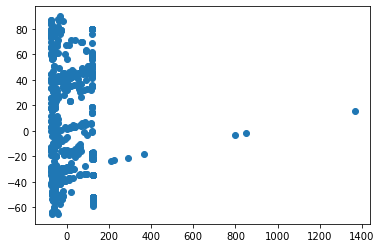

In [54]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])

#2- Bayes nets

A- The probability for a person to have symptoms of COVID-19 (sympton_onset=date) if this person visited Wuhan (visiting Wuhan=1)

In [55]:
data11.replace('NaN', np.nan, inplace=True)

In [56]:
p1= (len(data11.loc[(data11["symptom_onset"].notna()) & (data11["visiting Wuhan"]==1)])/len(data11["visiting Wuhan"]==1))*100
print("The probability is: ", p1, "%")

The probability is:  10.70110701107011 %


B- The probability for a person to be a true patient if this person has symptoms of COVID-19 and this person visited Wuhan

In [57]:
symptoms_wuhan= data11.loc[data11["symptom_onset"].notna() & data11["visiting Wuhan"]==1]
truePatient_symtoms_wuhan=data11.loc[(data11["symptom_onset"].notna()) & (data11["visiting Wuhan"]==1) & (data11['hosp_visit_date'].notna())]
p2=(len(truePatient_symtoms_wuhan)/len(symptoms_wuhan))*100
print("The probability is: ", p2, "%")

The probability is:  76.72413793103449 %


C- The probability for a person to death if this person visited Wuhan

In [58]:
visit_wuhan= data11.loc[data11["visiting Wuhan"]==1]
death_wuhan= data11.loc[(data11["death"].notna()) & (data11["visiting Wuhan"]==1)]
p3= (len(death_wuhan)/len(visit_wuhan))*100
print("The probability is: ", p3, "%")

The probability is:  100.0 %


#D- the average recovery interval for a patient if this person visited Wuhan

In [59]:
# data11.columns
data11.loc[data11["outcome"] == 'recovered']

,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,outcome


In [60]:
data12=data11.copy()
data12['symptom_onset2']=pd.to_datetime(data12['symptom_onset'], errors="coerce")
data12['recovered2']=pd.to_datetime(data12['recovered'], errors="coerce")

In [61]:
#lines that we couldn't parse all all zeros
data12['recovered']= data12['recovered'].replace('NaN', None)
data12[['recovered', 'recovered2']].loc[data12['recovered2'].isna() & data12['recovered'].notna()]
  

,recovered,recovered2
1,0,NaT
2,0,NaT
3,0,NaT
4,0,NaT
5,0,NaT
...,...,...
1080,0,NaT
1081,0,NaT
1082,0,NaT
1083,0,NaT


In [62]:
correct_format=data12[['symptom_onset2', 'recovered2']].loc[data12['symptom_onset2'].notna() & data12['recovered2'].notna() & data12["visiting Wuhan"]==1]
correct_format['recovery_period']=data12['recovered2']-data12['symptom_onset2']
correct_format

,symptom_onset2,recovered2,recovery_period
236,2020-01-03,2020-01-15,12 days
319,2020-02-14,1899-12-30,-43875 days
457,2020-01-24,2020-02-18,25 days
458,2020-01-24,2020-02-23,30 days
459,2020-01-21,2020-02-09,19 days
463,2020-01-28,2020-02-17,20 days
464,2020-01-30,2020-02-17,18 days
465,2020-01-23,2020-02-20,28 days
466,2020-01-30,2020-02-11,12 days
544,2020-01-10,2020-02-04,25 days


In [63]:
from datetime import datetime, timedelta
correct_format= correct_format.loc[correct_format['recovery_period']>timedelta(days=0)]
print('The average recovery interval for a person who has visited Wuhan is: ', correct_format['recovery_period'].mean())


The average recovery interval for a person who has visited Wuhan is:  20 days 16:30:00


# 3- Machine learning

### A

In [81]:
X=data12[['location', 'country', 'gender','If_onset_approximated',
        'visiting Wuhan', 'from Wuhan', 'symptom','age']]
y=data12.outcome

In [82]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

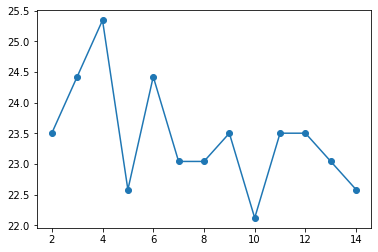

In [85]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()
# 22 will give us the best results

In [87]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=22)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=22)

In [89]:
accuracy =  knn.score(xtest, ytest)
print('accuracy: %f' % accuracy)
# 0.78 is not bad as a first result now we need to tune our model for this dataset

accuracy: 0.788018


## B

In [64]:
data12.columns

Index(['case_in_country', 'reporting date', 'location', 'country', 'gender',
       'age', 'symptom_onset', 'If_onset_approximated', 'hosp_visit_date',
       'exposure_start', 'exposure_end', 'visiting Wuhan', 'from Wuhan',
       'death', 'recovered', 'symptom', 'outcome', 'symptom_onset2',
       'recovered2'],
      dtype='object')

In [76]:
#Use the Regression to predict the age of persons based on other variables
X=data12[['location', 'country', 'gender','If_onset_approximated',
        'visiting Wuhan', 'from Wuhan', 'symptom','outcome']]
y=data12.age

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
model=lr()
model.fit(X_train_scaled, y_train);
y_train_pred=model.predict(X_train_scaled)
y_test_pred=model.predict(X_test_scaled)
train_mse=mse(y_train_pred, y_train)
test_mse=mse(y_test_pred, y_test)
print('Mean Squared Error of Linear regression on outcome: ')
print('Train: ', train_mse)
print('Test: ', test_mse)
# these values are really good because first of all they are really high which 
# means the values are not close close to the regression line and the difference betwenn these values 
# is low for training and testing datasets => less accured

Mean Squared Error of Linear regression on outcome: 
Train:  247.07544105565165
Test:  217.29213444277678


C

In [74]:
max_score=-1
best_n=0
for n in range(2,10):
  cl=KMeans(n_clusters=n).fit(X)
  labels=cl.labels_
  score= silhouette_score(X, labels)
  if score > max_score:
    max_score=score
    best_n= n
print('Best number of clusters based on Silhouette score is: ', best_n)

Best number of clusters based on Silhouette score is:  2


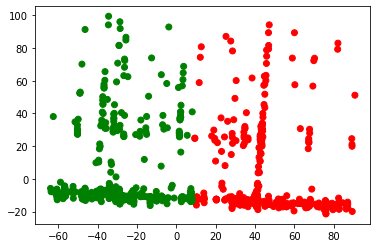

In [75]:
cl=KMeans(n_clusters=best_n).fit(X)
labels=cl.labels_
clusters_colors=list(map(lambda v: ['red', 'green','blue', 'black'][v], labels));
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=clusters_colors)

# Improving the results and Theoretical formalism

# A- 
Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class. So the predicted result will be more accurate if it is from the majority side.

# B-
Predicting The Missing Values
Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm.